# Topic Classification using Deep Learning Methods
by [CSpanias](https://cspanias.github.io/aboutme/), 3rd Week's Project for [Solving Business Problems with NLP](https://omdena.com/course/solving-business-problems-with-nlp/) by Omdena, 03/2022

# CONTENT
1. [Text Pre-Processing](#textpre)
1. [Topic Classification with Deep Learning](#nns)
    1. [Word2Vec](#word2vec)
    1. [GloVe](#glove)
    1. [FastText](#fastText)
    1. [Affinity Propagation](#AffinityPropagation)
    1. [CorEx](#corex)
5. [Conclusions](#conc)

After attempting __topic classification__ using __LDA__, __NMF__, and __SVD__ on [week's 2 project](https://github.com/CSpanias/nlp_resources/blob/main/nlp_omdena/w2/oddysey_project.ipynb), we will now use __Deep Learning__ methods for the same purpose and __compare the results__.

Using `LDA` I could infer __some sort of a relationships with some of the topics only from the LDA model__. The results from the other two models include a lot of __overlapping words__, so I couldn't relate any particular characteristic to any of the 5 topics.

1. __Topic 0__ seems to be centered around __Penelope__ (the wife of Odysseus) as it contains words such as "wife", "bed", "lay", "woman", "mother", and "men", among others.
2. __Topic 1__ hints a relation with __Telemachus__ (the son of Odysseus and Penelope). The words "away", "father", "penelope", and "kill" could be related with him travelling away to find his father and being involved in the Trojan war.
3. __Topic 4__ must be related with __Odysseus__ as it has words like "Ulysseus", "return", "old", "home", "son", "ship", and "sea" which hint towards the return of him back to Ithaca by sea and the return to his old home.

For __Topics 2 and 3__ I couldn't infer any kind of relationship.

I will experiment with the same text, __Homer's Odyssey__, for the ease of comparison.

You can find the __Plain Text UTF-8__ version of the text on the [Project Gutenberg website](https://www.gutenberg.org/ebooks/1727).

First, we will __import the text__, we will make sure that is of __class string__, and we will __take a look at the text's first few characters__ to get a feel of it.

In [1]:
# import text as string
with open(r"odyssey_homer.txt", encoding="utf8") as f:
    raw = f.read()
    
# check dtype
print(f"Variable 'raw' is of type: {type(raw)}\n")

# check text
print(f"First 1000 characters:\n\n{raw[:1000]}\n")

Variable 'raw' is of type: <class 'str'>

First 1000 characters:

The Project Gutenberg eBook of The Odyssey, by Homer

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: The Odyssey

Author: Homer

Translator: Samuel Butler

Release Date: April, 1999 [eBook #1727]
[Most recently updated: January 4, 2022]

Language: English


Produced by: Jim Tinsley and David Widger

*** START OF THE PROJECT GUTENBERG EBOOK THE ODYSSEY ***

[Illustration]




The Odyssey

by Homer

rendered into English prose for the use of those who cannot read the
original

Contents

 PREFACE TO FIRST EDITION
 PREFACE TO SE

<a name="textpre"></a>
# 1. Text Pre-Processing

We will first __sentence-tokenize__ text and then make a main function to perform all the __text preprocessing__ steps.

_For a step-by-step explanation of text pre-processing go [here](https://github.com/CSpanias/nlp_resources/blob/main/dphi_nlp_bootcamp/01_Text_Wrangling.ipynb)._

In [15]:
from nltk.tokenize import sent_tokenize

# tokenize the text
sents = sent_tokenize(raw)

# check the number of sents
print(f"The text was tokenized in {len(sents)} sents.\n")

# check the first 2 sents
print(f"First sentence: {sents[0]}\n")
print(f"Second sentence: {sents[1]}")

The text was tokenized in 3855 sents.

First sentence: The Project Gutenberg eBook of The Odyssey, by Homer

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever.

Second sentence: You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org.


In [16]:
import pandas as pd
import numpy as np
pd.options.display.max_colwidth = 200

# create a pandas DataFrame
corpus_df = pd.DataFrame(
    # col_name: value
    {'Sentences': sents})

# check DF
corpus_df.head()

,Sentences
0,"The Project Gutenberg eBook of The Odyssey, by Homer\n\nThis eBook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restricti..."
1,"You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this eBook or online at\nwww.gutenberg.org."
2,"If you are not located in the United States, you\nwill have to check the laws of the country where you are located before\nusing this eBook."
3,"Title: The Odyssey\n\nAuthor: Homer\n\nTranslator: Samuel Butler\n\nRelease Date: April, 1999 [eBook #1727]\n[Most recently updated: January 4, 2022]\n\nLanguage: English\n\n\nProduced by: Jim Tin..."
4,BOOK II.


In [17]:
from nltk.corpus import wordnet

def pos_tag_wordnet(tagged_tokens):
    """Convert POS-tagged tokens to WordNet form tags."""
    tag_map = {'j': wordnet.ADJ, 'v': wordnet.VERB, 'n': wordnet.NOUN, 'r': wordnet.ADV}
    # if a word does not belong to one of the 4 categories make it a NOUN
    new_tagged_tokens = [(word, tag_map.get(tag[0].lower(), wordnet.NOUN)) for word, tag in tagged_tokens]
    return new_tagged_tokens

In [43]:
import re
import contractions

from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def normalize_corpus(raw):
    
    # remove special chars
    text = re.sub(r'[^a-zA-Z\s]', ' ', raw)
    # expand contracted words
    text = [contractions.fix(w) for w in raw.split()]
    # join text back
    text = " ".join(text)
    # tokenize text
    tokens = word_tokenize(text)
    # lower-case words
    tokens = [w.lower() for w in tokens]
    # define stopwords list
    sw = set(stopwords.words('english'))
    # remove stopwords
    tokens = [w for w in tokens if w not in sw]
    # remove non-alphabetical chars
    tokens = [w for w in tokens if w.isalpha()]
    # POS-tag tokens
    tagged_tokens = pos_tag(tokens)
    # convert tags to WordNet form
    wd_tagged_tokens = pos_tag_wordnet(tagged_tokens)
    # instantiate lemmatizer
    wnl = WordNetLemmatizer()
    # lemmatize tokens
    tokens = [wnl.lemmatize(w, tag) for w, tag in wd_tagged_tokens]
    # join back text as a string
    text = " ".join(tokens)
    
    return text

In [44]:
# vectorize function
normalize_corpus = np.vectorize(normalize_corpus)

# apply the vectorized function
norm_corpus = normalize_corpus(sents)

# show normalized corpus
norm_corpus

array(['project gutenberg ebook odyssey homer ebook use anyone anywhere united state part world cost almost restriction whatsoever',
       'may copy give away term project gutenberg license include ebook online',
       'locate united state check law country locate use ebook', ...,
       'project ebooks often create several printed edition confirm protected copyright unless copyright notice include',
       'thus necessarily keep ebooks compliance particular paper edition',
       'people start website main pg search facility website include information project include make donation project gutenberg literary archive foundation help produce new ebooks subscribe email newsletter hear new ebooks'],
      dtype='<U724')

In [45]:
# tokenize corpus
tokenized_corpus = [word_tokenize(sent) for sent in norm_corpus]

# check first sent
print(tokenized_corpus[0])

['project', 'gutenberg', 'ebook', 'odyssey', 'homer', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'state', 'part', 'world', 'cost', 'almost', 'restriction', 'whatsoever']


<a name="nns"></a>
# 2. Topic Classification with Deep Learning

We will try various deep learning models:
1. Word2Vec
2. GloVe
3. FastText
4. AffinationPropagation
5. CorEx

<a name="word2vec"></a>
## 2.1 Word2Vec

In our workflow, we will tokenize our normalized corpus and then focus on the following parameters in the Word2Vec model to build it.

* `vector_size` The word embedding dimensionality
* `window` The context window size
* `min_count` The minimum word count
* `sample` The downsample setting for frequent words
* `sg` Training model, 1 for skip-gram otherwise CBOW

More info about `gensim.models.word2vec` [here](https://radimrehurek.com/gensim/models/word2vec.html).

In [46]:
from gensim.models import word2vec

# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 20  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words
sg = 1               # skip-gram model
sorted_vocab = 1     # sort by descending frequency
compute_loss = True  # computes and stores loss values

# instantiate and train word2vec model
w2v_model = word2vec.Word2Vec(tokenized_corpus, vector_size=feature_size, 
                              window=window_context,
                              min_count = min_word_count,
                              sg=sg, sample=sample,
                              epochs=5000,
                              sorted_vocab=sorted_vocab,
                              compute_loss=compute_loss)

We can __visualize the results with__ `matplotlib` using __t-distributed stochastic neighbor embedding__ (t-SNE), and see how the tokens are clustering.

Click [here](https://www.youtube.com/watch?v=NEaUSP4YerM&t=79s) for a brief t-SNE introduction.

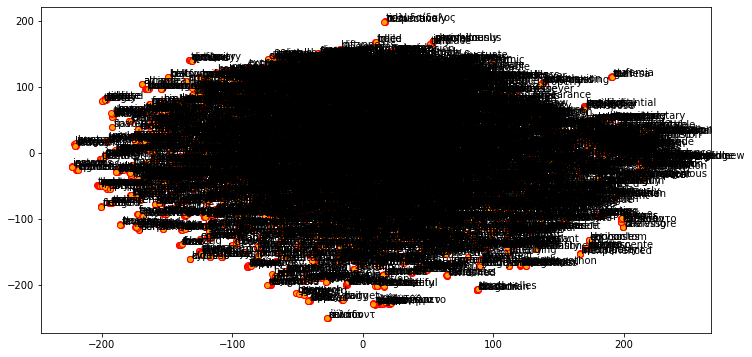

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
%matplotlib inline

# extract labels
words = w2v_model.wv.index_to_key
wvs = w2v_model.wv[words]

# instantiate TSNE
tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)

# fit TSNE
T = tsne.fit_transform(wvs)
labels = words

# plot visualization
plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

We can __visualize the vector reprentation__ of each word via a pandas DataFrame. 

In [48]:
import pandas as pd

# create pandas DataFrame to visualize the vector reprentation of each word
vec_df = pd.DataFrame(wvs, index=words)

# show dataframe
vec_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
go,-0.046563,0.113128,0.095247,-0.220213,0.323735,-0.175819,-0.183081,-0.251394,-0.053384,-0.327375,0.799953,0.200113,0.010235,0.069672,-0.230568
say,-0.188229,-0.059395,0.246310,-0.270955,0.544837,-0.417879,-0.111734,-0.252836,0.070907,-0.098581,0.488377,-0.089023,-0.175871,0.118060,-0.171658
ulysses,-0.059593,-0.007981,0.222293,-0.265131,0.430034,-0.507800,0.001793,-0.352427,-0.228065,-0.130676,0.363253,-0.132570,-0.122735,0.042868,-0.059485
come,-0.126199,0.050187,0.246202,-0.221790,0.525650,-0.276142,-0.149167,-0.127144,-0.112732,-0.401638,0.352934,0.041375,-0.009032,0.120529,-0.071357
one,-0.007612,0.306861,0.246842,-0.123052,0.508135,-0.287940,0.034621,0.010167,-0.229990,-0.262424,0.189677,-0.180511,-0.203855,0.318198,0.056860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
murderess,0.344259,-0.705999,3.223940,-1.727517,0.698907,2.139905,-3.864358,1.507824,-0.927818,-1.379901,0.491853,-0.204213,-4.311629,0.042543,-3.628473
cassandra,0.082976,-3.871452,2.122782,-2.230313,2.002559,-0.680998,-4.929260,0.935890,-1.525238,-2.046451,2.080466,0.167836,-1.040072,-2.692603,-0.301813
nobleman,0.928609,0.652556,-2.598921,-6.757182,-0.276411,3.097641,-1.418341,0.642705,-3.842592,2.460270,3.250930,1.906017,-2.563366,0.701659,-1.294039
gorgeous,0.778151,0.413311,-2.083295,-6.204207,-0.362479,2.591512,-1.123152,0.334635,-3.302349,1.961974,2.820362,1.784599,-2.230946,0.477338,-1.017646


In addition, we can __visualize the similarity between each word__.

In [49]:
from sklearn.metrics.pairwise import cosine_similarity

# create similarity matrix
similarity_matrix = cosine_similarity(vec_df.values)

# create pandas DataFrame for the similarity matrix
similarity_df = pd.DataFrame(similarity_matrix, index=words, columns=words)

# show dataframe
similarity_df

,go,say,ulysses,come,one,take,make,house,would,tell,...,adore,champion,aeacus,march,joyful,murderess,cassandra,nobleman,gorgeous,afflicted
go,1.000000,0.784994,0.707739,0.828199,0.518138,0.823628,0.663033,0.800744,0.494337,0.711212,...,0.034568,0.200013,0.236061,0.463483,0.106786,0.267245,0.435536,0.305865,0.317004,0.029740
say,0.784994,1.000000,0.904715,0.871355,0.686315,0.751056,0.639545,0.816861,0.644854,0.752593,...,0.207467,0.344065,0.420303,0.391003,0.299565,0.287494,0.459055,0.110327,0.124409,0.248187
ulysses,0.707739,0.904715,1.000000,0.841191,0.744740,0.711776,0.741211,0.785834,0.654935,0.672801,...,0.073960,0.240226,0.341695,0.293718,0.306982,0.145173,0.403910,0.112693,0.133564,0.124105
come,0.828199,0.871355,0.841191,1.000000,0.795513,0.829481,0.677157,0.766050,0.763894,0.815549,...,0.260289,0.307498,0.324712,0.325134,0.106066,0.308956,0.523733,0.080812,0.096292,0.186922
one,0.518138,0.686315,0.744740,0.795513,1.000000,0.742679,0.734730,0.574217,0.880302,0.497193,...,0.284244,0.193289,0.208818,0.085373,0.269487,0.231896,0.158645,0.050920,0.048618,0.350760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
murderess,0.267245,0.287494,0.145173,0.308956,0.231896,0.207217,-0.004421,0.125063,0.344188,0.236123,...,0.659391,0.554918,0.568004,0.416076,0.446460,1.000000,0.616768,0.376194,0.373142,0.764730
cassandra,0.435536,0.459055,0.403910,0.523733,0.158645,0.326019,0.165562,0.400755,0.202012,0.473930,...,0.417086,0.562209,0.605828,0.283106,0.288026,0.616768,1.000000,0.235393,0.251796,0.411056
nobleman,0.305865,0.110327,0.112693,0.080812,0.050920,0.062895,0.173074,0.411694,0.156485,0.187258,...,0.485417,0.534199,0.546470,0.473069,0.628878,0.376194,0.235393,1.000000,0.998045,0.303783
gorgeous,0.317004,0.124409,0.133564,0.096292,0.048618,0.057805,0.170680,0.430620,0.158440,0.201928,...,0.469576,0.545374,0.561290,0.473539,0.630321,0.373142,0.251796,0.998045,1.000000,0.288995


In [50]:
# assign feature names to a variable
feature_names = np.array(words)

# create df with each feature (word) and the three most similar words to it
similarity_df.apply(lambda row: feature_names[np.argsort(-row.values)[1:4]], axis=1)

go                           [leave, get, back]
say                  [ulysses, therefore, come]
ulysses                       [say, come, back]
come                       [say, ulysses, back]
one                       [see, would, another]
                            ...                
murderess             [slut, shameless, smirch]
cassandra    [encouragingly, desolate, defence]
nobleman          [gorgeous, picnic, miserably]
gorgeous          [picnic, nobleman, miserably]
afflicted          [reveller, shudder, elysian]
Length: 5902, dtype: object

<a name="Glove"></a>
## 2.2 GloVe

**GloVe** stands for **Global Vectors** which is an **unsupervised learning model** which can be used to **obtain dense word vectors similar to Word2Vec**. 

However the **technique is different** and training is performed on an aggregated global word-word co-occurrence matrix, giving us **a vector space with meaningful sub-structures**. 

The **basic methodology** of the GloVe model is:
1. create a huge **word-context co-occurence matrix** consisting of `(word, context)` pairs such that **each element in this matrix represents how often a word occurs with the context**. 
2. apply **matrix factorization to approximate this matrix**.

We aim to reconstruct __WC__ from __WF__ and __FC__ by multiplying them. For this, we typically initialize __WF__ and __FC__ with some random weights and attempt to multiply them to get an approximation of __WC__ and measure how close it is to __WC__. 

We do this multiple times using **Stochastic Gradient Descent** (SGD) to minimize the error. 

Finally, the __Word-Feature matrix__ (WF) **gives us the word embeddings for each word** where __F__ can be preset to a specific number of dimensions.

<img src="https://cdn-images-1.medium.com/max/800/1*UNtsSilztKXjLG99VXxSQw.png" alt="Drawing" align="Left" style="width: 60%;"/>

The **spaCy framework** comes with capabilities to leverage GloVe embeddings based on different language models. You can also get **pre-trained word vectors and load them up as needed** using `gensim` or `spaCy`.

We will be using the __[`en_core_web_lg`](https://spacy.io/models/en#en_core_web_lg)__ model which consists of **300-dimensional word vectors** trained on [Common Crawl](http://commoncrawl.org) with GloVe.

In [51]:
import spacy

# load spaCy model
nlp = spacy.load('en_core_web_lg')

# check the length of vectors
total_vectors = len(nlp.vocab.vectors)

print('Total word vectors:', total_vectors)

Total word vectors: 684830


Now we can get the __GloVe embeddings__ for each of our words in our corpus.

In [52]:
# get the tokenized vocabulary of the corpus as a list of words
unique_words = list(set([word for sublist in tokenized_corpus for word in sublist]))

# get the vector representation of each word
word_glove_vectors = np.array([nlp(word).vector for word in unique_words])

# create a pandas DataFrame for each token and its vectors
vec_df = pd.DataFrame(word_glove_vectors, index=unique_words)

# print DataFrame
vec_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
sire,-0.356530,0.306260,-0.574830,-0.158250,0.453700,-0.070828,0.263960,0.357110,-0.252050,0.62315,...,-0.423440,0.158120,-0.894090,-0.556880,0.325100,0.320650,0.583920,0.086472,0.192270,0.015134
agreeable,-0.106050,0.181300,-0.501130,-0.151170,-0.032616,0.074835,0.057952,0.176440,-0.024474,1.29580,...,-0.067799,0.144830,-0.102080,0.031814,0.503610,-0.053432,0.332430,-0.405190,-0.094457,-0.034074
poor,-1.172800,0.245140,-0.380370,-0.053600,-0.640900,-0.307810,0.452380,-0.205380,-0.335610,2.66580,...,-0.576840,0.263030,-0.021811,0.175080,0.009650,0.420790,0.055763,0.058612,-0.465920,-0.174160
spell,-0.143630,0.047154,-0.306080,0.125900,-0.248360,-0.261990,-0.215640,-0.006327,-0.576460,1.58310,...,-0.056274,0.381410,-0.225300,0.667710,-0.127370,0.158590,-0.547710,0.015922,0.444380,-0.440930
conceal,0.071534,-0.244040,-0.122910,0.162130,-0.302430,-0.394810,-0.301080,0.285360,-0.802920,1.35020,...,-0.408850,0.181410,-0.426560,0.171560,0.160380,-0.192060,0.615800,0.282470,0.369020,0.210130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
borrow,-0.094431,-0.553700,-0.003532,-0.083429,-0.250680,-0.184440,-0.153040,-0.486350,-0.140010,1.82520,...,-0.495000,0.048966,0.142280,0.140880,0.447370,-0.150510,0.140760,-0.256790,0.011806,-0.314910
reverberate,0.289160,0.503070,0.034871,0.211800,0.529000,-0.032653,-0.486030,0.240300,-0.494350,0.70125,...,-0.322180,-0.035876,0.243560,0.418760,-0.042285,0.504090,-0.144760,0.255230,-0.236810,-0.204200
overhung,0.846040,-0.195260,-0.291340,-0.137640,-0.041836,0.206930,0.186900,0.446240,-0.350470,-1.06740,...,0.225750,-0.995840,0.544220,-0.638280,-0.578730,-0.184290,0.745720,-0.337410,-0.218750,-0.436880
loathe,0.003006,-0.164040,0.061765,-0.124250,-0.166020,0.173580,0.019472,-0.267190,0.029233,1.20070,...,0.020546,0.199140,-0.350530,-0.131970,-0.240000,0.427640,-0.280870,-0.074931,0.140110,-0.067065


We can now use **t-SNE** to visualize these embeddings as well as check __pairwise similarity__ between words, similar to what we did using our Word2Vec embeddings.

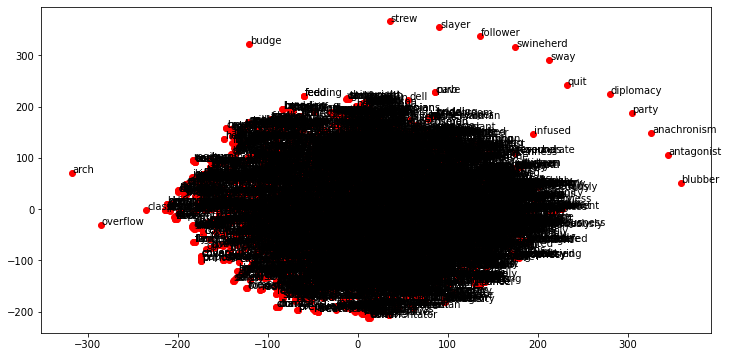

In [53]:
# instantiate tSNE
tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=3)

np.set_printoptions(suppress=True)

# fit tsne to GloVe vectors
T = tsne.fit_transform(word_glove_vectors)

# create labels
labels = unique_words

# create visualization
plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='red', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [54]:
# create similarity matrix
similarity_matrix = cosine_similarity(vec_df.values)

# create a pandas DataFrame
similarity_df = pd.DataFrame(similarity_matrix, index=unique_words, columns=unique_words)

# show DataFrame
similarity_df

,sire,agreeable,poor,spell,conceal,post,phantom,boyhood,guest,add,...,unblended,trill,minstrel,address,periplus,borrow,reverberate,overhung,loathe,perished
sire,1.000000,0.098265,0.148598,0.097415,0.117951,-0.018772,0.099848,0.162351,0.037072,0.012147,...,0.115568,0.058784,0.117152,-0.011183,-0.073837,0.044701,0.015654,0.003029,0.010817,0.191841
agreeable,0.098265,1.000000,0.213928,0.141108,0.302527,0.065201,0.072885,0.230690,0.166938,0.118935,...,0.157312,0.169259,0.138573,0.096961,0.043787,0.196874,0.145783,0.165006,0.276481,0.143282
poor,0.148598,0.213928,1.000000,0.325400,0.193021,0.216357,0.207787,0.140590,0.175145,0.149904,...,-0.034030,0.012772,0.119715,0.211686,-0.099329,0.310593,0.048996,-0.002018,0.261208,0.270684
spell,0.097415,0.141108,0.325400,1.000000,0.202184,0.180775,0.195759,0.103995,0.110342,0.308786,...,-0.094417,0.137915,0.114855,0.157787,-0.012213,0.224752,0.109754,-0.051527,0.204420,0.157312
conceal,0.117951,0.302527,0.193021,0.202184,1.000000,0.001453,0.227936,0.167946,0.032916,0.206740,...,0.053394,0.039907,0.109532,0.190963,-0.009526,0.276654,0.171657,0.167810,0.304583,0.181789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
borrow,0.044701,0.196874,0.310593,0.224752,0.276654,0.165534,0.161821,0.147624,0.126247,0.256923,...,-0.038976,0.014234,-0.000767,0.139318,-0.036999,1.000000,0.095376,0.015482,0.291598,0.045249
reverberate,0.015654,0.145783,0.048996,0.109754,0.171657,-0.040103,0.092368,0.236488,-0.028263,0.025591,...,0.086396,0.229439,0.189568,0.060316,-0.003194,0.095376,0.999999,0.188640,0.158033,0.181134
overhung,0.003029,0.165006,-0.002018,-0.051527,0.167810,-0.105686,0.062333,0.120863,-0.075627,-0.125493,...,0.252357,0.210364,0.094980,-0.113433,0.083908,0.015482,0.188640,1.000000,0.103201,0.144359
loathe,0.010817,0.276481,0.261208,0.204420,0.304583,0.087498,0.053988,0.141764,0.067585,0.131941,...,0.052317,0.084430,0.105463,0.000383,0.006808,0.291598,0.158033,0.103201,1.000000,0.157121


In [55]:
# assign feature names (words) to a variable
feature_names = np.array(unique_words)

# sort DataFrame so that each feature (word) has the 3 most similar words next to it
similarity_df.apply(lambda row: feature_names[np.argsort(-row.values)[1:4]], 
                    axis=1)

sire                          [stallion, mare, foal]
agreeable      [pleasant, advantageous, exceedingly]
poor                          [bad, worse, terrible]
spell                    [enchantment, summon, word]
conceal                [hide, disguise, concealment]
                               ...                  
borrow                      [borrowing, lend, repay]
reverberate              [resound, resounds, rankle]
overhung                       [thickly, crag, hewn]
loathe                      [detest, loath, dislike]
perished                     [perish, fled, escaped]
Length: 5902, dtype: object

<a name="fastText"></a>
## 2.3 FastText

FastText is **a framework for learning word representations** and also performing robust, fast and accurate **text classification**. 

The framework is **open-sourced** by Facebook on [GitHub](https://github.com/facebookresearch/fastText) and claims to have the following:

1. Recent **state-of-the-art English word vectors**.
2. Word vectors for **157 languages** trained on Wikipedia and Crawl.
3. Models for **language identification** and various supervised tasks.

*A **high-level overview of the FastText Model** can be found [here](https://www.youtube.com/watch?v=4l_At3oalzk) as well as the official **FastText tutorial** [here](https://fasttext.cc/docs/en/supervised-tutorial.html).*

**Predictive models**, lile the **Word2Vec model**, typically ignores the morphological structure of each word; **considers a word as a single entity** and **generate a dense embedding for the word**.

However this poses to be a serious limitation with **languages having massive vocabularies** and many **rare words** which may not occur a lot in different corpora. 

The FastText model considers each word as a Bag of Character n-grams (**subword model**). We add special **boundary symbols**, **`<`** and **`>`**, at the beginning and end of words, so we can **distinguish prefixes and suffixes** from other character sequences. We also **include the word itself in the set of its n-grams**, to learn a representation for each word (in addition to its character n-grams). 

Taking the word **`where`** and **n=3** (tri-grams) as an example, it will be represented by the character n-grams:
* **<wh, whe, her, ere, re>** <br>
and <br>
* the special sequence **< where >** representing the whole word. 

Note that the sequence , corresponding to the word **`< her >`** is different from the tri-gram **`her`** from the word **`where`**.

In practice, it is recommended to extract all the n-grams for **n ≥ 3** and **n ≤ 6**. 

This is a very simple approach, and different sets of n-grams could be considered, for example taking all prefixes and suffixes. We typically **associate a vector representation (embedding) to each n-gram** for a word. 

Thus, we can **represent a word by the sum of the vector representations of its n-grams or the average of the embedding of these n-grams**. 

Thus, due to this effect of leveraging n-grams from individual words based on their characters, there is a **higher chance for rare words to get a good representation** since their character based n-grams should occur across other words of the corpus.

In [56]:
from gensim.models.fasttext import FastText

# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 20  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words
sg = 1               # skip-gram model

# instantiate and train the model
ft_model = FastText(tokenized_corpus, vector_size=feature_size, 
                     window=window_context, min_count = min_word_count,
                     sg=sg, sample=sample, epochs=5000)

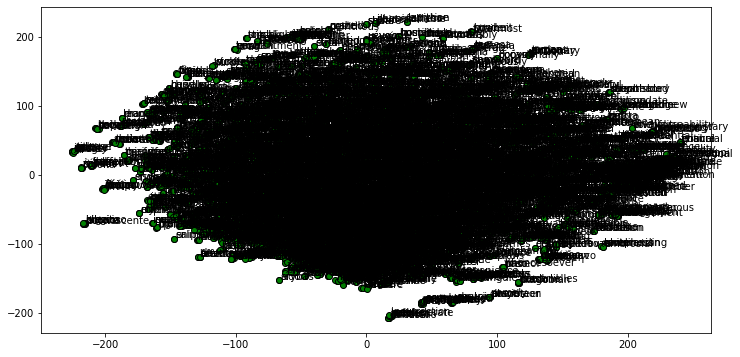

In [57]:
# visualize embeddings
from sklearn.manifold import TSNE

#
words = ft_model.wv.index_to_key
wvs = ft_model.wv[words]

# instantiate tSNE
tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)

np.set_printoptions(suppress=True)

# train tSNE
T = tsne.fit_transform(wvs)

# get labels
labels = words

# generate the plot
plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='green', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [58]:
def average_word_vectors(words, model, vocabulary, num_features):
    """Calculate the average word vectors."""
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector


def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [59]:
# get document level embeddings
ft_doc_features = averaged_word_vectorizer(corpus=tokenized_corpus, model=ft_model,
                                             num_features=feature_size)

# createa a pandas DataFrame
pd.DataFrame(ft_doc_features)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.107033,-0.257712,0.934672,0.559356,0.686412,0.447946,-0.869933,1.894799,1.459755,-1.916570,0.397112,0.515644,-0.852542,1.297885,0.549002
1,1.254809,-0.601824,1.379148,-0.504156,1.079953,-0.067444,-0.208640,2.384728,1.941919,-1.668585,0.818902,0.808836,-0.674634,1.334193,0.660699
2,1.200457,-0.251950,0.974955,-0.058585,0.529732,0.056667,-1.031909,2.050088,0.897333,-1.652671,1.246199,1.045728,-1.006129,1.082732,0.167535
3,0.276970,-0.927038,1.301236,1.378255,2.153215,0.830994,-1.514208,2.617846,2.296189,-2.033484,0.183094,1.497957,-0.442312,2.048704,1.078270
4,-0.030012,-1.079105,1.141255,0.954837,1.089585,-0.739677,-0.837649,2.022358,0.571746,0.305362,-0.568516,1.962668,0.417151,0.705438,1.112067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,0.710247,-0.181846,1.662149,-0.244348,0.338349,0.084848,-0.439830,2.344689,2.584766,-2.150858,0.741672,0.486941,0.221942,0.534831,0.672667
3851,0.554523,0.388400,1.710742,-0.329672,1.001149,1.012695,-0.067734,2.623292,2.291972,-1.810588,1.093883,-0.345498,-0.213911,0.827246,0.766652
3852,0.560451,0.008423,1.499729,-0.494843,1.720102,0.195239,-0.689705,2.700927,1.748089,-0.899192,1.334562,1.449301,-1.035777,0.849274,1.448733
3853,0.319070,-0.642746,0.823955,-0.326663,1.859310,1.282834,-0.756218,1.870903,1.425502,-0.000835,1.503368,1.952871,0.070900,1.094950,0.973991


<a name="AffinityPropagation"></a>
## 2.4 Document Clustering with Affinity Propagation

Now that we have our **features for each document**, we can cluster these documents using the **Affinity Propagation** algorithm, which is a clustering algorithm based on the concept of “**message passing**” between data points and does not need the number of clusters as an explicit input which is often required by partition-based clustering algorithms.

*More info on Affinity Propagation algorithm [here](https://www.geeksforgeeks.org/affinity-propagation-in-ml-to-find-the-number-of-clusters/)*.

In [80]:
from sklearn.cluster import AffinityPropagation

# instantiate AffinityPropagation
ap = AffinityPropagation(random_state=42, preference=-50, damping=0.9, max_iter=5000)

# train AP
ap.fit(ft_doc_features)

# get labels
cluster_labels = ap.labels_

# create pandas DataFrame
cluster_labels = pd.DataFrame(cluster_labels, 
                              columns=['Cluster Label'])

# concatenate the 2 DataFrames
pd.concat([corpus_df, cluster_labels], axis=1)

,Sentences,Cluster Label
0,"The Project Gutenberg eBook of The Odyssey, by Homer\n\nThis eBook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restricti...",24
1,"You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this eBook or online at\nwww.gutenberg.org.",24
2,"If you are not located in the United States, you\nwill have to check the laws of the country where you are located before\nusing this eBook.",24
3,"Title: The Odyssey\n\nAuthor: Homer\n\nTranslator: Samuel Butler\n\nRelease Date: April, 1999 [eBook #1727]\n[Most recently updated: January 4, 2022]\n\nLanguage: English\n\n\nProduced by: Jim Tin...",24
4,BOOK II.,0
...,...,...
3850,General Information About Project Gutenberg-tm electronic works\n\nProfessor Michael S. Hart was the originator of the Project\nGutenberg-tm concept of a library of electronic works that could be\...,24
3851,"For forty years, he produced and\ndistributed Project Gutenberg-tm eBooks with only a loose network of\nvolunteer support.",24
3852,"Project Gutenberg-tm eBooks are often created from several printed\neditions, all of which are confirmed as not protected by copyright in\nthe U.S. unless a copyright notice is included.",24
3853,"Thus, we do not\nnecessarily keep eBooks in compliance with any particular paper\nedition.",19


__PCA Visualization__

We can also **visualize how each document in positioned in each cluster** by using **Principal Component Analysis** (PCA) to **reduce the feature dimensions to 2-D**.

*More info on PCA [here](https://www.youtube.com/watch?v=HMOI_lkzW08)*.

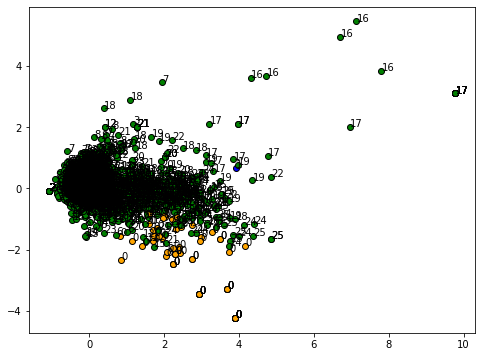

In [84]:
from sklearn.decomposition import PCA

# instantiate PCA
pca = PCA(n_components=2, random_state=42)

# train PCA
pcs = pca.fit_transform(ft_doc_features)

# get labels
labels = ap.labels_

# generate visualization
categories = list(cluster_labels['Cluster Label'])

plt.figure(figsize=(8, 6))

for i in range(len(labels)):
    label = labels[i]
    color = 'orange' if label == 0 else 'blue' if label == 1 else 'green'
    annotation_label = categories[i]
    x, y = pcs[i]
    plt.scatter(x, y, c=color, edgecolors='k')
    plt.annotate(annotation_label, xy=(x+1e-2, y+1e-2), xytext=(0, 0), 
                 textcoords='offset points')

<a name="corex"></a>
# 2.5 CorEx

_More info on [CorEx](https://github.com/gregversteeg/corex_topic/blob/master/corextopic/example/corex_topic_example.ipynb)._

The topic model assumes input is in the form of a __doc-word matrix__, where rows are documents and columns are binary counts. 

We'll vectorize the data, take the top 20,000 words, and convert it to a sparse matrix to save on memory usage. 

Note, we use __binary count vectors as input to the `CorEx` topic model__.

In [89]:
import scipy.sparse as ss
from sklearn.feature_extraction.text import CountVectorizer

# transform data into a sparse matrix
vectorizer = CountVectorizer(stop_words='english', max_features=20000, binary=True)
doc_word = vectorizer.fit_transform(norm_corpus)
doc_word = ss.csr_matrix(doc_word)

doc_word.shape # n_docs x m_words

(3855, 5725)

Our doc-word matrix is 3,855 sentences by 5,725 words. 

Let's get the words that __label the columns__. We'll need these for outputting __readable topics__ and later for __anchoring__.

In [92]:
# Get words that label the columns (needed to extract readable topics and make anchoring easier)
words = list(np.asarray(vectorizer.get_feature_names()))
print(words[:10])

['abandon', 'abate', 'abet', 'abhorred', 'abide', 'abides', 'able', 'aboard', 'abode', 'abominable']


The __main parameters__ of the CorEx topic model are:

* `n_hidden`: number of topics ("hidden" as in "hidden latent topics")
* `words`: words that label the columns of the doc-word matrix (optional)
* `docs`: document labels that label the rows of the doc-word matrix (optional)
* `max_iter`: number of iterations to run through the update equations (optional, defaults to 200)
* `verbose`: if verbose=1, then CorEx will print the topic TCs with each iteration
* `seed`: random number seed to use for model initialization (optional)


We'll train a topic model with 25 topics.

In [174]:
import corextopic.corextopic as ct
import corextopic.vis_topic as vt

# Train the CorEx topic model with 4 topics
topic_model = ct.Corex(n_hidden=4, words=words, max_iter=1000, verbose=0, seed=1)

# fit model to data
topic_model.fit(doc_word, words=words);

The CorEx topic model provides functionality for easily __accessing the topics__. Let's take a look one of the topics.

In [177]:
# Print a single topic from CorEx topic model
topic_model.get_topics(topic=0, n_words=10)

[('say', 0.09926673241572775, 1.0),
 ('father', 0.05857472767832096, 1.0),
 ('answer', 0.04717486517435672, 1.0),
 ('son', 0.04395668562172449, 1.0),
 ('ulysses', 0.03964742480368083, 1.0),
 ('come', 0.029782346232644363, 1.0),
 ('shall', 0.029745672809366908, 1.0),
 ('man', 0.029329201780131542, 1.0),
 ('home', 0.025664982403053024, 1.0),
 ('house', 0.02381322786584103, 1.0)]

The topic words are those with the __highest mutual information with the topic__, rather than those with highest probability within the topic as in LDA. 

The mutual information with the topic is the number reported in each tuple. CorEx also returns the "sign" of each word, which is either `1` or `-1`. If the sign is `-1`, then that means the __absence of a word is informative__ in that topic, rather than its presence.

If the column labels have not been specified through words, then the code will return the column indices for the top words in each topic.

We can also retrieve all of the topics at once if we would like.

In [178]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: say, father, answer, son, ulysses, come, shall, man, home, house
1: project, work, odyssey, gutenberg, copy, electronic, line, term, foundation, license
2: ship, sea, wind, water, sail, land, shore, wave, rock, day
3: wine, drink, hand, make, head, cloak, round, eat, meat, shoulder


We can also get the column indices instead of the column labels if necessary.

In [126]:
topic_model.get_topics(topic=0, n_words=10, print_words=False)

[(4306, 0.09926673241572775, 1.0),
 (1836, 0.05857472767832096, 1.0),
 (214, 0.04717486517435672, 1.0),
 (4611, 0.04395668562172449, 1.0),
 (5218, 0.03964742480368083, 1.0),
 (920, 0.029782346232644363, 1.0),
 (4410, 0.029745672809366908, 1.0),
 (3033, 0.029329201780131542, 1.0),
 (2422, 0.025664982403053024, 1.0),
 (2459, 0.02381322786584103, 1.0)]

If we need to directly access the topic assignments for each word, they can be accessed through `clusters`.

In [179]:
print(topic_model.clusters)
print(topic_model.clusters.shape) # m_words

[0 2 1 ... 1 1 3]
(5725,)


As with the topic words, the __most probable documents per topic can also be easily accessed__. 

Documents are sorted according to log probabilities which is why the highest probability documents have a score of `0` ($e^0=1$) and other documents have negative scores (for example, $e^{-0.5} \approx 0.6$).

In [180]:
# Print a single topic from CorEx topic model
topic_model.get_top_docs(topic=0, n_docs=10, sort_by='log_prob')

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


[(2969, 0.0),
 (1459, 0.0),
 (1088, 0.0),
 (560, 0.0),
 (2534, 0.0),
 (1090, 0.0),
 (191, 0.0),
 (3137, 0.0),
 (2118, 0.0),
 (364, 0.0)]

`CorEx` is a __discriminative model__, whereas `LDA` is a __generative model__. 

This means that while `LDA` outputs a __probability distribution over each document__, `CorEx` instead estimates the __probability a document belongs to a topic given that document's words__. 

As a result, the probabilities across topics for a given document do not have to add up to 1. The estimated probabilities of topics for each document can be accessed through `log_p_y_given_x` or `p_y_given_x`.

In [181]:
print(topic_model.p_y_given_x.shape) # n_docs x k_topics

(3855, 4)


We can also use a `softmax` to make a binary determination of which documents belong to each topic. 

These softmax labels can be accessed through `labels`.

In [182]:
print(topic_model.labels.shape) # n_docs x k_topics

(3855, 4)


Since CorEx does not prescribe a probability distribution of topics over each document, this means that a document could possibly belong to no topics (all 0's across topics in `labels`) or all topics (all 1's across topics in `labels`).

__Overall TC__

Total correlation is the measure which `CorEx` maximize when constructing the topic model. It can be accessed through `tc` and is reported in nats.

In [183]:
topic_model.tc

4.100564503284473

__Model selection__

`CorEx` starts its algorithm with a random initialization, and so different runs can result in different topic models. 

One way of finding a better topic model is to restart the `CorEx` algorithm several times and take the run that has the highest TC value (i.e. the run that produces topics that are most informative about the documents).

__Topic TC__


The overall total correlation is the sum of the total correlation per each topic. These can be accessed through `tcs`. 

For an __unsupervised CorEx topic model__, the topics are always sorted from high to low according to their TC. 

For an __anchored CorEx topic model__, the topics are not sorted, and are outputted such that the anchored topics come first.

In [184]:
topic_model.tcs.shape # k_topics

(4,)

In [185]:
topic_model.tcs

array([1.14 , 1.032, 0.984, 0.945])

__Selecting the Number of Topics__


One way to choose the number of topics is to observe the distribution of TCs for each topic to see how much each additional topic contributes to the overall TC. 

We should keep adding topics until additional topics do not significantly contribute to the overall TC. This is similar to choosing a __cutoff eigenvalue__ when doing topic modeling via `LSA`.

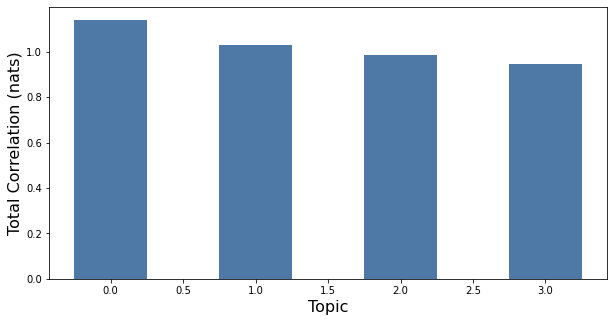

In [186]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

After initializing `CorEx` with __25 topics__ from which only the first 4 were the __most informative__, we __re-initialized the model with just those 4__. 

__Pointwise Document TC__


We can decompose total correlation further. The topic correlation is the average of the pointwise total correlations for each individual document. The pointwise total correlations can be accessed through `log_z`.

In [189]:
topic_model.log_z

array([[ 1.333, 12.089,  1.1  ,  1.298],
       [ 1.539,  8.207,  1.1  ,  1.298],
       [ 1.516,  4.404,  1.098,  1.297],
       ...,
       [ 2.121, 10.033,  1.107,  1.661],
       [ 2.121,  4.474,  1.1  ,  1.298],
       [-0.227, 26.037,  1.099,  0.884]])

__Anchoring for Semi-Supervised Topic Modeling__


Anchored CorEx is an extension of CorEx that allows the "anchoring" of words to topics. When anchoring a word to a topic, CorEx is trying to __maximize the mutual information between that word and the anchored topic__. 

So, anchoring provides a way to __guide the topic model towards specific subsets of words that the user would like to explore__.

__Anchoring a single set of words to a single topic:__ this can help promote a topic that did not naturally emerge when running an unsupervised instance of the CorEx topic model.

In [192]:
# Anchor one word to the first topic
anchor_words = ['ulysses']

In [193]:
# Anchor the word 'ulysses' to the first topic
anchored_topic_model = ct.Corex(n_hidden=4, seed=2)
anchored_topic_model.fit(doc_word, words=words, anchors=anchor_words, anchor_strength=5 );

In [194]:
topic_words,_,_ = zip(*anchored_topic_model.get_topics(topic=0))
print('0: ' + ', '.join(topic_words))

0: ulysses, suitor, laertes, eumaeus, swineherd, noble, stockman, alcinous, forget, hit


__Anchoring single sets of words to multiple topics:__ This can help find different aspects of a topic that may be discussed in several different contexts.

In [224]:
# Anchor 'ulysses' and 'odysseus' to first topic, 'penelope' and 'wife' to second topic, so on...
anchor_words = [['ulysses', 'odysseus'], ['penelope', 'wife'], ['telemachus', 'son'], ['poseidon', 'god']]

anchored_topic_model = ct.Corex(n_hidden=4, seed=2)
anchored_topic_model.fit(doc_word, words=words, anchors=anchor_words, anchor_strength=5);

In [225]:
for n in range(len(anchor_words)):
    topic_words,_,_ = zip(*anchored_topic_model.get_topics(topic=n))
    print('{}: '.format(n) + ', '.join(topic_words))

0: ulysses, odysseus, return, eumaeus, noble, swineherd, long, minerva, stockman, answered
1: penelope, wife, say, house, servant, hand, make, good, woman, shall
2: son, telemachus, father, answer, atreus, pisistratus, laertes, nestor, tell, reply
3: god, sea, wind, ship, wave, jove, sail, raise, rock, heaven


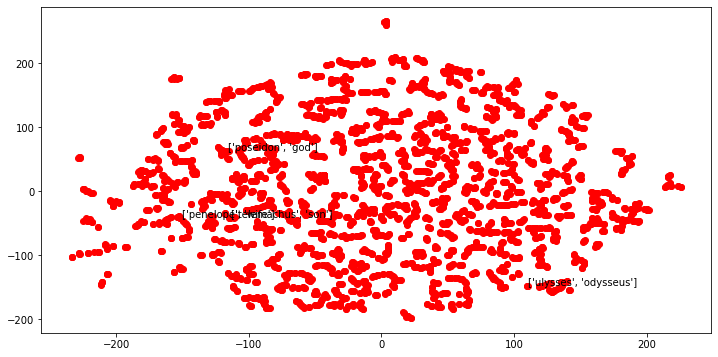

In [226]:
# instantiate tSNE
tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=3)

np.set_printoptions(suppress=True)

# fit tsne to GloVe vectors
T = tsne.fit_transform(anchored_topic_model.log_z)

# create labels
labels = anchor_words

# create visualization
plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='red', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

__Anchoring different sets of words to multiple topics:__ This can help enforce topic separability if there appear to be chimera topics.

We can continue to develop even more involved anchoring strategies. Here we anchor "ulysses" by itself, as well as in two other topics each with "man", "travel", and 'ithaca' to find different aspects around the word "ulysses".

In [197]:
# Anchor with single words and groups of words
anchor_words = ['ulysses', ['ulysses', 'man'], ['ulysses', 'travel'], ['ulysses', 'ithaca']]

anchored_topic_model = ct.Corex(n_hidden=4, seed=2)
anchored_topic_model.fit(doc_word, words=words, anchors=anchor_words, anchor_strength=3);

In [198]:
for n in range(len(anchor_words)):
    topic_words,_,_ = zip(*anchored_topic_model.get_topics(topic=n))
    print('{}: '.format(n) + ', '.join(topic_words))

0: ulysses, laertes, minerva, stockman, mind, throw, shoulder, hit, sang, skill
1: ulysses, man, house, good, son, make, hand, drink, shall, father
2: ulysses, travel, bow, noble, phaeacians, alcinous, king, string, trial, forget
3: ulysses, ithaca, say, answer, home, suitor, tell, come, telemachus, speak


In [214]:
from corextopic import vis_topic as vt
vt.vis_rep(topic_model, column_label=words, prefix='topic-model-example')

Print topics in text file


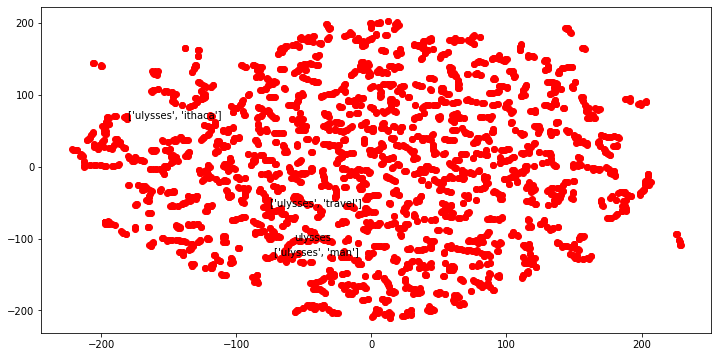

In [223]:
# instantiate tSNE
tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=3)

np.set_printoptions(suppress=True)

# fit tsne to GloVe vectors
T = tsne.fit_transform(anchored_topic_model.log_z)

# create labels
labels = anchor_words

# create visualization
plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='red', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

<a name="conc"></a>
# 6. Conclusions

Deep Learning models are entirely new to me, thus, I should probably have tried less models!

The __anchored CorEx model__ seemed to perform far better than __LDA__ as the following output makes perfect sense:

>0: ulysses, odysseus, return, eumaeus, noble, swineherd, long, minerva, stockman, answered <br>
1: penelope, wife, say, house, servant, hand, make, good, woman, shall <br>
2: son, telemachus, father, answer, atreus, pisistratus, laertes, nestor, tell, reply <br>
3: god, sea, wind, ship, wave, jove, sail, raise, rock, heaven

I did not manage to find a proper way to visualize the topics and the clustering of the topics/words, and got a bit lost on this project while searching for a way to do that. 